#### Objective:
This script ranks movies using different metrics to balance ratings and popularity. The **weighted scoring method** penalizes movies with low numbers of ratings while rewarding high ratings, producing a more balanced ranking.

#### Weighted Scoring:
To compute a weighted score for each movie:
\[
\text{Weighted Score} = \frac{\text{Average Rating} \times \text{Number of Ratings}}{\text{Number of Ratings} + \lambda}
\]
Where:
- $\text{Average Rating}$ is the mean rating of the movie.
- $\text{Number of Ratings}$ is the total count of ratings for the movie.
- $\lambda$ is the damping factor, controlling the penalty for movies with few ratings.

#### Steps:
1. For each movie:
   - Calculate the average rating $\text{Average Rating} = \frac{\sum \text{Ratings}}{\text{Number of Ratings}}$.
   - Count the total number of ratings $\text{Number of Ratings}$.
2. Apply the weighted score formula.
3. Rank movies by their weighted scores in descending order.

#### Output:
The top $N$ movies are returned, ranked by their weighted scores.


Base Data Tables:
Movies Table: 9742 rows, 3 columns
Ratings Table: 100836 rows, 4 columns

Movies Table (Sample):
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Ratings Table (Sample):
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

Step 1: Merging Movies and Ratings.

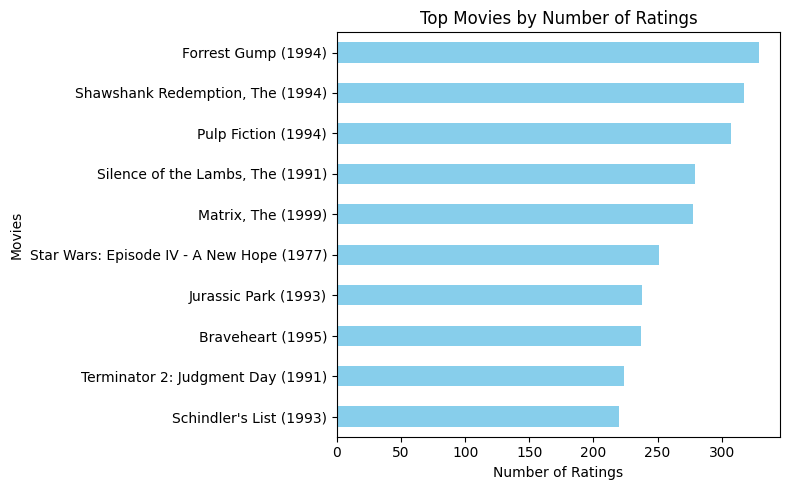

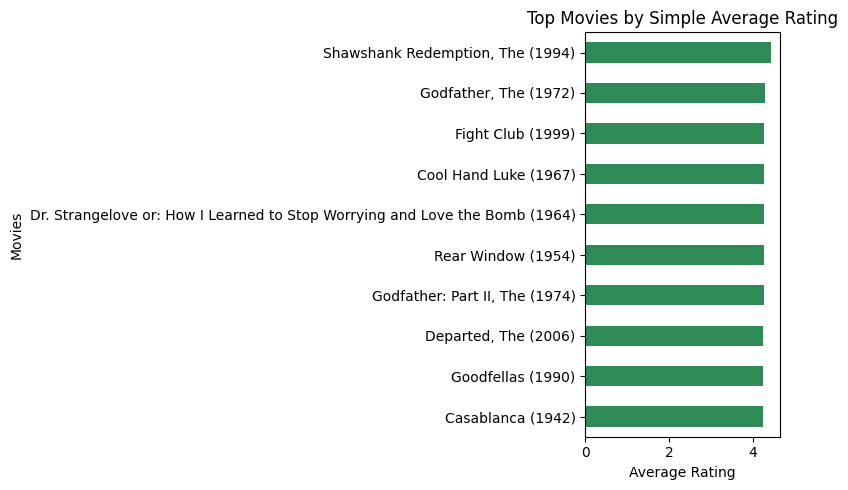

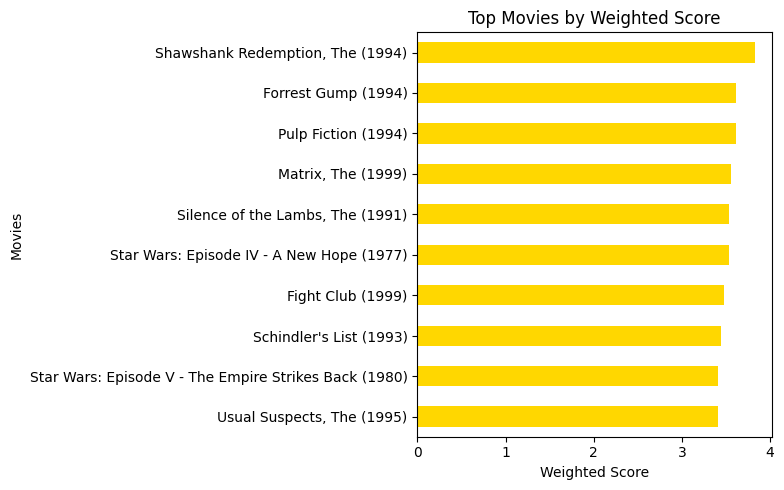

In [2]:
import pandas as pd

# Hyperparameters and Variables
path = 'data/ml-latest-small/'  # Path to dataset
movies_path = path + "movies.csv"
ratings_path = path + "ratings.csv"
min_ratings = 50  # Minimum ratings for a movie to be considered in top-rated metrics
lambda_value = 50  # Damping factor for weighted score (higher = penalizes low-rating-count movies)
top_n = 10  # Number of top movies to display

# Load datasets
movies = pd.read_csv(movies_path)
ratings = pd.read_csv(ratings_path)

# Describe base data tables
print("\nBase Data Tables:")
print(f"Movies Table: {movies.shape[0]} rows, {movies.shape[1]} columns")
print(f"Ratings Table: {ratings.shape[0]} rows, {ratings.shape[1]} columns")

# Display sample data
print("\nMovies Table (Sample):")
print(movies.head(5))
print("\nRatings Table (Sample):")
print(ratings.head(5))

# Step 1: Merge Movies and Ratings Datasets
print("\nStep 1: Merging Movies and Ratings...")
movie_ratings = ratings.merge(movies, on="movieId")
print(f"Merged Data: {movie_ratings.shape[0]} rows, {movie_ratings.shape[1]} columns")
print("\nMerged Dataset (Sample):")
print(movie_ratings.head(5))

# Metric 1: Most Rated Movies
print("\nStep 2: Calculating Most Rated Movies...")
most_rated = (
    movie_ratings.groupby("title")
    .size()
    .sort_values(ascending=False)
    .head(top_n)
)
print("\nMost Rated Movies:")
print(most_rated)

# Metric 2: Top-Rated Movies (Simple Average)
print("\nStep 3: Calculating Top-Rated Movies (Simple Average)...")
average_ratings = (
    movie_ratings.groupby("title")
    .agg(average_rating=("rating", "mean"), num_ratings=("rating", "size"))
)

# Filter by minimum ratings
filtered_top_rated_simple = average_ratings[average_ratings["num_ratings"] >= min_ratings]
top_rated_simple = filtered_top_rated_simple.sort_values(
    by="average_rating", ascending=False
).head(top_n)

print("\nTop-Rated Movies (Simple Average with Minimum Ratings):")
print(top_rated_simple)

# Metric 3: Top-Rated Movies (Weighted Score)
print("\nStep 4: Calculating Top-Rated Movies (Weighted by Popularity)...")
average_ratings["weighted_score"] = (
    average_ratings["average_rating"] * average_ratings["num_ratings"]
) / (average_ratings["num_ratings"] + lambda_value)

top_rated_weighted = average_ratings.sort_values(
    by="weighted_score", ascending=False
).head(top_n)

print("\nTop-Rated Movies (Weighted Score):")
print(top_rated_weighted[["average_rating", "num_ratings", "weighted_score"]])

# Optional: Visualization (Bar Charts)
try:
    import matplotlib.pyplot as plt

    # Plot Most Rated Movies
    plt.figure(figsize=(8, 5))
    most_rated.plot(kind="barh", color="skyblue")
    plt.title("Top Movies by Number of Ratings")
    plt.xlabel("Number of Ratings")
    plt.ylabel("Movies")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    # Plot Top-Rated Movies (Simple Average)
    plt.figure(figsize=(8, 5))
    top_rated_simple["average_rating"].plot(kind="barh", color="seagreen")
    plt.title("Top Movies by Simple Average Rating")
    plt.xlabel("Average Rating")
    plt.ylabel("Movies")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    # Plot Top-Rated Movies (Weighted Score)
    plt.figure(figsize=(8, 5))
    top_rated_weighted["weighted_score"].plot(kind="barh", color="gold")
    plt.title("Top Movies by Weighted Score")
    plt.xlabel("Weighted Score")
    plt.ylabel("Movies")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

except ImportError:
    print("\nMatplotlib is not installed. Install it to visualize the results.")

